In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('train.csv')
df.drop(columns=['id'], inplace=True)
df.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,26933.000000,26976.000000,27033.000000,27065.000000,27034.000000,26926.000000,26978.000000,27023.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,193309.698660,0.277219,0.571056,0.683746,0.036184,5.044752,0.198926,-7.418965,0.321167,0.093773,116.557754,3.393967,0.581015,0.36440
std,45713.675116,0.298704,0.189676,0.213314,0.149116,3.379665,0.151879,3.892481,0.466932,0.083474,26.188606,0.525198,0.237429,0.48127
min,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-30.170399,0.000000,0.015065,63.478876,2.000000,0.013398,0.00000
25%,166492.000000,0.039530,0.425141,0.538968,0.000952,2.000000,0.111956,-9.586576,0.000000,0.038421,97.000171,3.000000,0.398907,0.00000
50%,186908.000000,0.140486,0.607879,0.705028,0.001967,6.000000,0.136253,-6.356886,0.000000,0.055611,113.795116,3.000000,0.599059,0.00000
75%,215039.000000,0.484065,0.718443,0.870518,0.003226,8.000000,0.213505,-4.618818,1.000000,0.117877,128.497863,4.000000,0.760160,1.00000
max,470577.000000,1.065284,0.957131,1.033434,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,218.637439,5.000000,1.022283,1.00000


In [13]:
X = df.drop(columns=['song_popularity'], axis=1)
Y = df['song_popularity']
print(X.shape, Y.shape)

(30000, 13) (30000,)


In [14]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

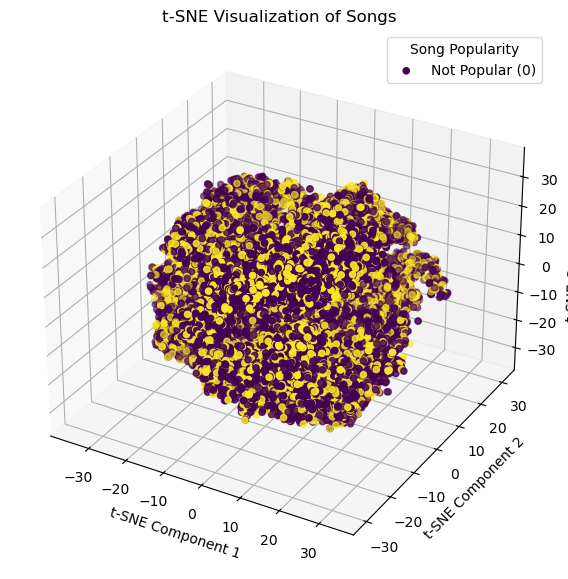

In [17]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=Y, cmap='viridis')
plt.title('t-SNE Visualization of Songs')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.legend(title='Song Popularity', labels=['Not Popular (0)', 'Popular (1)'])
plt.grid(True)
plt.show()


In [19]:
df2 = pd.read_csv('result2.csv')
df2.describe()

,id,song_popularity
count,10000.00000,10000.000000
mean,4999.50000,0.447600
std,2886.89568,0.497272
min,0.00000,0.000000
25%,2499.75000,0.000000
50%,4999.50000,0.000000
75%,7499.25000,1.000000
max,9999.00000,1.000000


In [ ]:
demo_df = pd.read_csv('submission.csv')
threshold = 0.35

#if greater than threshold then 1 else 0
demo_df['song_popularity'] = (demo_df['song_popularity'] >= threshold).astype(int)
# convert to another csv file
demo_df.to_csv('new_result.csv', index=False)
